## About Dataset

### Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

### Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

#### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.


#### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.


#### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.


#### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.


#### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.


#### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.


#### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.


#### 8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.


#### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.


#### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

------------------------------------------
## import libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
data = pd.read_csv('water_potability.csv') # (3276, 10)

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

-----------------------------------------
## EDA 探索式資料分析

the correllation Before handelling the null values

<AxesSubplot:>

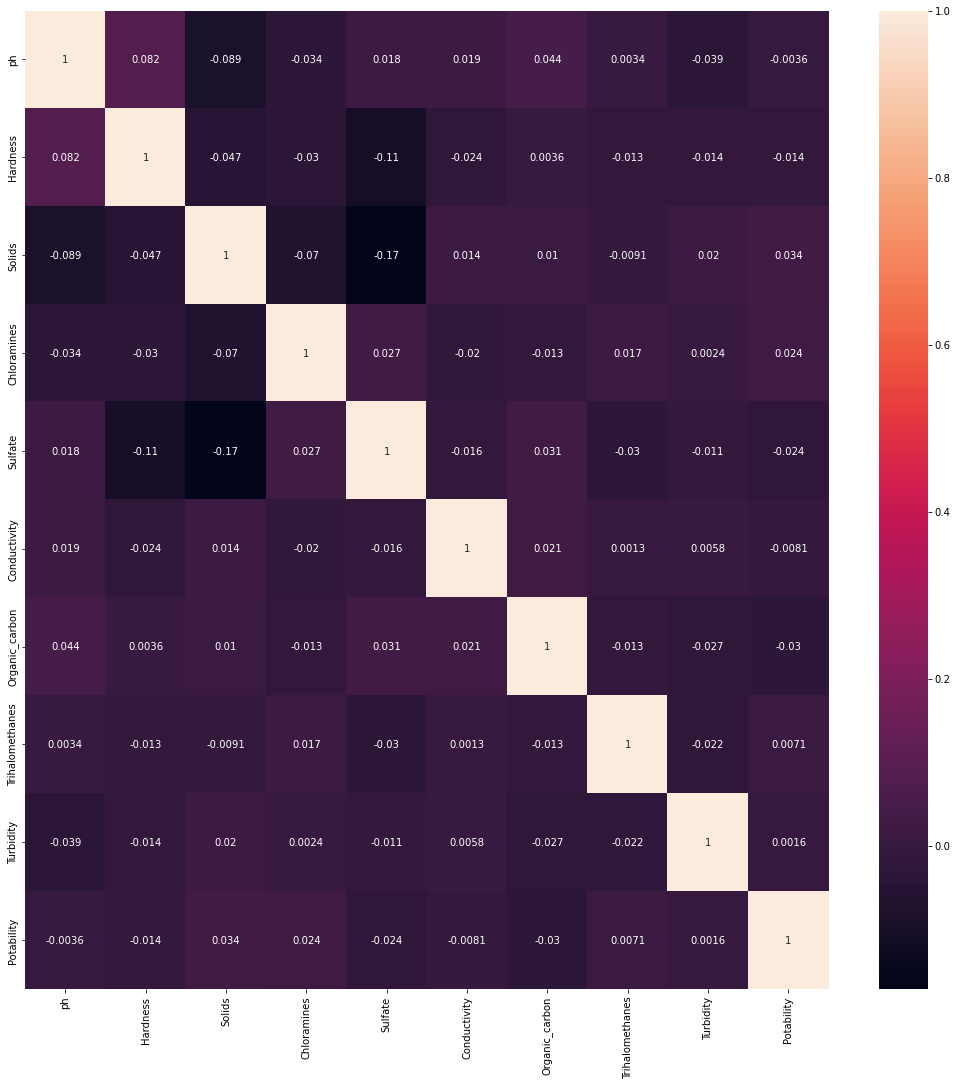

In [5]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), ax = ax, annot = True)

<AxesSubplot:>

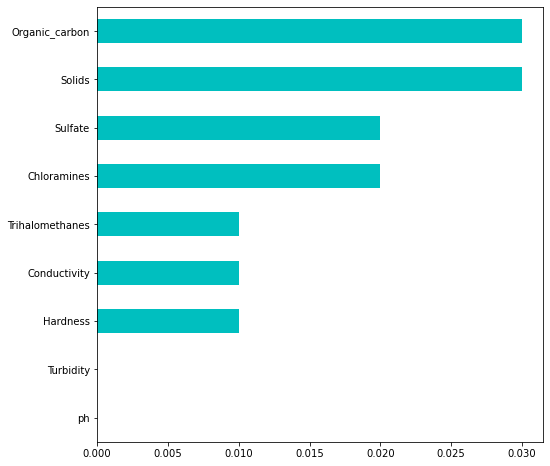

In [6]:
fig,ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

In [7]:
(data['Potability']==0).sum() # 1998

1998

In [8]:
data[data['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [9]:
(data['Potability']==1).sum() # 1278

1278

In [10]:
data[data['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [11]:
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)
data = data.dropna() # (2495, 10)

In [12]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
data.shape

(2495, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2495 non-null   float64
 1   Hardness         2495 non-null   float64
 2   Solids           2495 non-null   float64
 3   Chloramines      2495 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     2495 non-null   float64
 6   Organic_carbon   2495 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2495 non-null   float64
 9   Potability       2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


the correllation After handelling the null values

<AxesSubplot:>

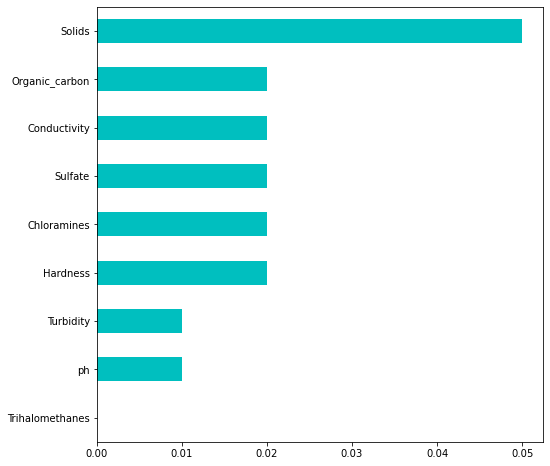

In [15]:
fig,ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

<AxesSubplot:>

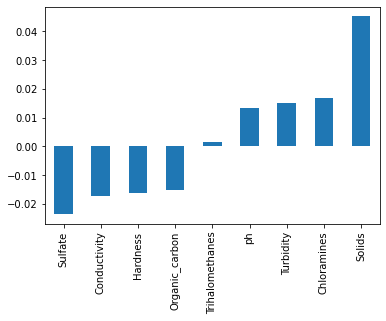

In [16]:
data.corr()['Potability'][:-1].sort_values().plot(kind='bar')

In [17]:
trace = go.Pie(labels = ['Potable', 'Not Potable'], values = data['Potability'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Drinkable Water')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

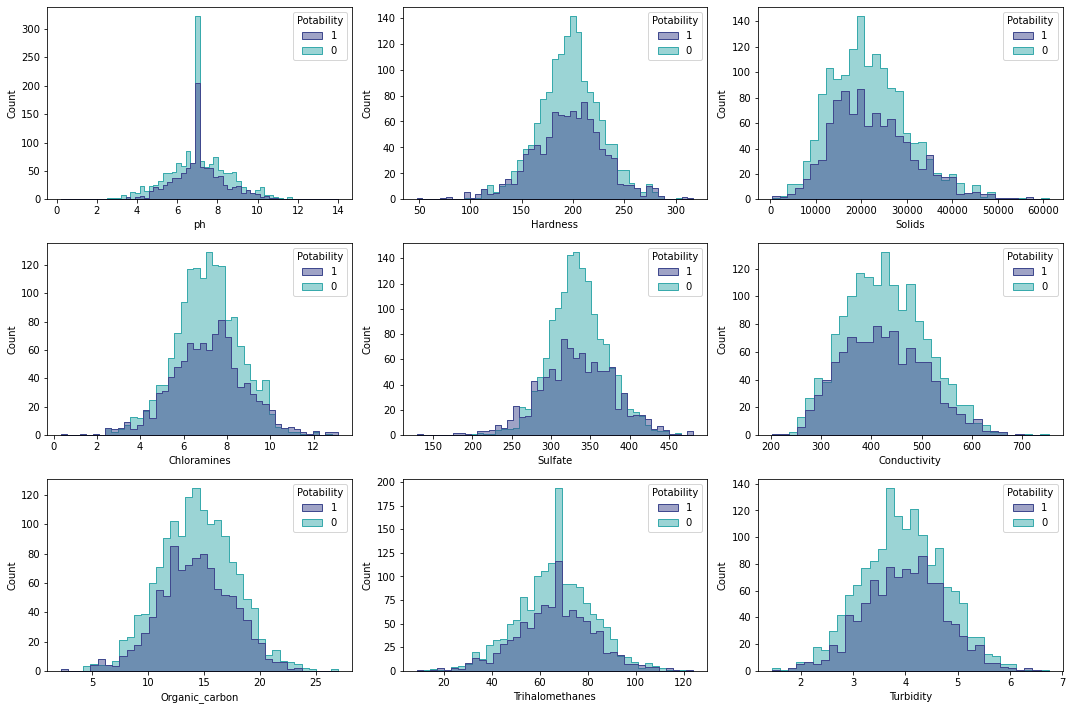

In [18]:
plt.figure(figsize = (15,10), tight_layout = True)

for i, feature in enumerate(data.columns):
    if feature != 'Potability':

        plt.subplot(3,3,i+1)
        sns.histplot(data = data, x =feature, palette = 'mako', hue = 'Potability',alpha = 0.5, element="step",hue_order=[1,0] )

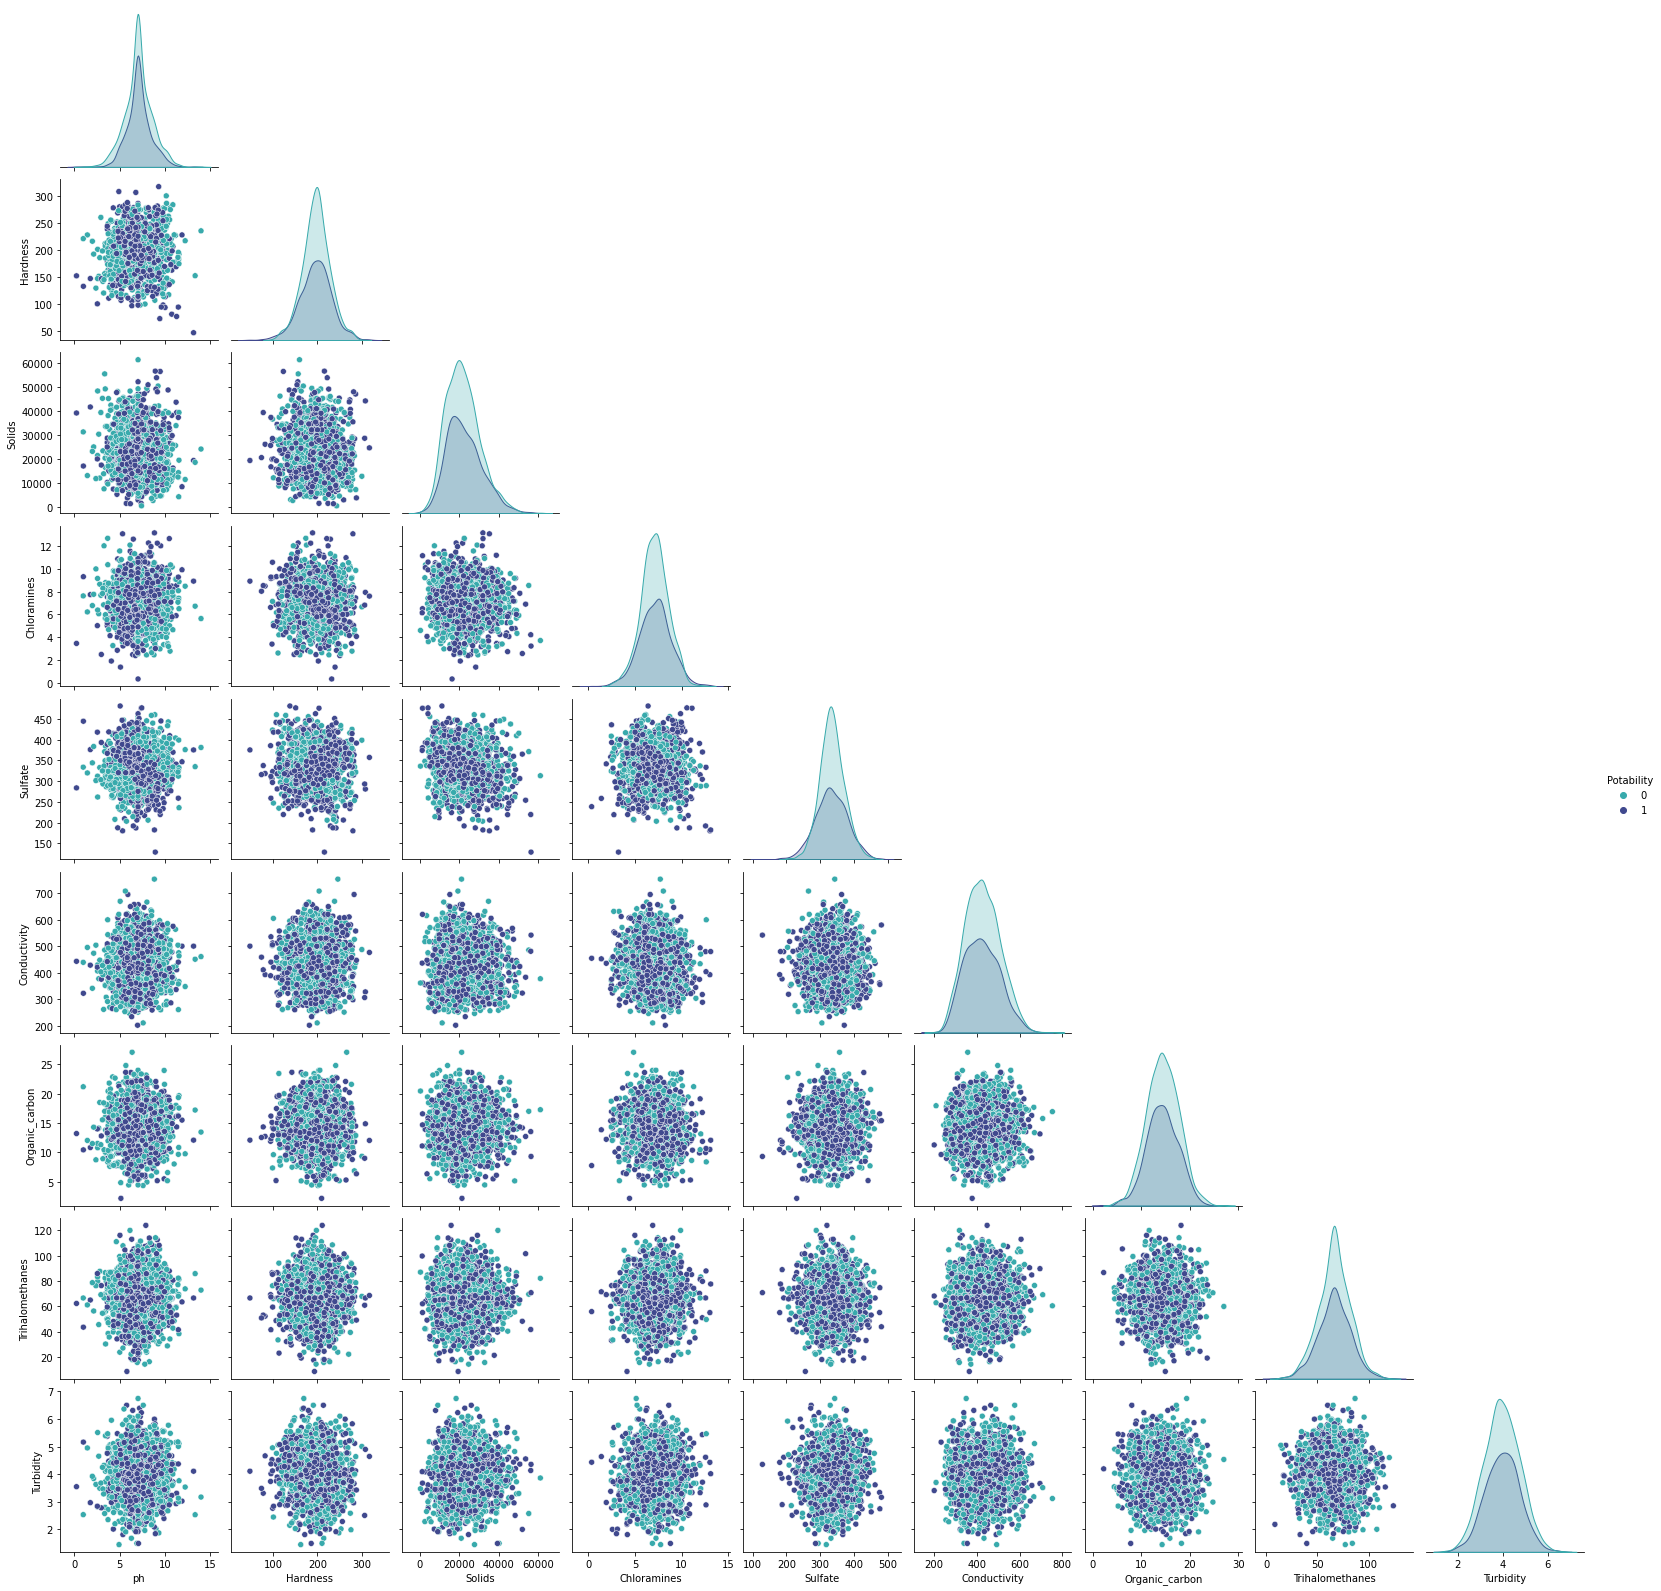

In [19]:
sns.pairplot(data = data,hue = 'Potability',palette='mako_r', corner=True)

-----------------------------------------
## Data Splitting

In [20]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

-----------------------------
## Data Scalling

In [22]:
scaler = MinMaxScaler()


In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print('training shape : ',X_train.shape)
print('testing shape : ',X_test.shape)

training shape :  (1746, 9)
testing shape :  (749, 9)


------------------------------
## Modelling

In [24]:
model = Sequential() # Initialising the ANN

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

2022-10-18 17:39:20.381518: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

2022-10-18 17:39:20.909181: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
55/55 [==============================] - 1s 6ms/step - loss: 0.6908 - val_loss: 0.6881
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6852 - val_loss: 0.6792
Epoch 3/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6770 - val_loss: 0.6700
Epoch 4/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6728 - val_loss: 0.6689
Epoch 5/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6688
Epoch 6/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6721 - val_loss: 0.6688
Epoch 7/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6688
Epoch 8/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6690
Epoch 9/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6721 - val_loss: 0.6685
Epoch 10/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6721 - val_loss: 0.6686
Epoch 11/

In [26]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

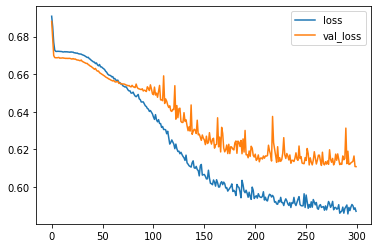

In [27]:
model_loss.plot()

In [28]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       457
           1       0.64      0.46      0.53       292

    accuracy                           0.69       749
   macro avg       0.67      0.65      0.65       749
weighted avg       0.68      0.69      0.67       749



In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[380  77]
 [158 134]]
Accuracy: 68.62483311081442%


In [32]:
model = Sequential()
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=900,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/900
55/55 [==============================] - 1s 5ms/step - loss: 0.6737 - val_loss: 0.6668
Epoch 2/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6727 - val_loss: 0.6674
Epoch 3/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6723 - val_loss: 0.6669
Epoch 4/900
55/55 [==============================] - 0s 3ms/step - loss: 0.6723 - val_loss: 0.6672
Epoch 5/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6727 - val_loss: 0.6672
Epoch 6/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6723 - val_loss: 0.6677
Epoch 7/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.6670
Epoch 8/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6718 - val_loss: 0.6672
Epoch 9/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.6677
Epoch 10/900
55/55 [==============================] - 0s 2ms/step - loss: 0.6721 - val_loss: 0.6679
Epoch 11/

<AxesSubplot:>

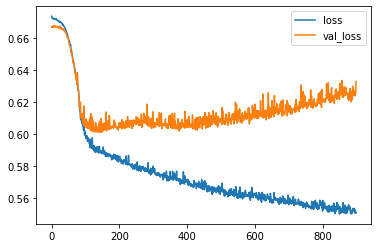

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       457
           1       0.59      0.50      0.54       292

    accuracy                           0.67       749
   macro avg       0.65      0.64      0.64       749
weighted avg       0.66      0.67      0.66       749



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[357 100]
 [147 145]]
Accuracy: 67.02269692923899%


In [38]:
model = Sequential()
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='tanh'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/500
55/55 [==============================] - 1s 7ms/step - loss: 3.4368 - val_loss: 0.7890
Epoch 2/500
55/55 [==============================] - 0s 3ms/step - loss: 0.7345 - val_loss: 0.6955
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6853 - val_loss: 0.6744
Epoch 4/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6738 - val_loss: 0.6708
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6721 - val_loss: 0.6705
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6720 - val_loss: 0.6704
Epoch 7/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6718 - val_loss: 0.6702
Epoch 8/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6716 - val_loss: 0.6701
Epoch 9/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6719 - val_loss: 0.6703
Epoch 10/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6714 - val_loss: 0.6700
Epoch 11/

<AxesSubplot:>

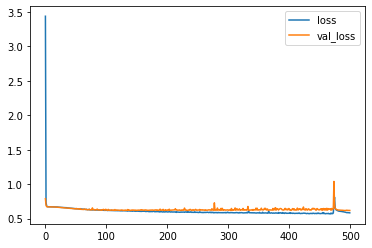

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       457
           1       0.64      0.41      0.50       292

    accuracy                           0.68       749
   macro avg       0.67      0.63      0.64       749
weighted avg       0.68      0.68      0.66       749



In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[390  67]
 [171 121]]
Accuracy: 68.22429906542055%
